In [1]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *

In [2]:
# B = z + B x B

def random_binary_tree_free(x,maxi):
    size = 0
    def genB():
        nonlocal size # compteur global   
        if random.random() < 2*x/(1-math.sqrt(1-4*x)):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        else:
            return [genB(), genB()]
    try:
        return genB(), size
    except Exception as err:
        #print(err)
        return None, 0

In [3]:
t,s = random_binary_tree_free(.24999,100)
print(t,s)

['z'] 1


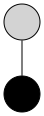

In [4]:
draw_tree_unlabelled2(t,5,5)

In [5]:
def random_binary_tree(x, n):
    return gen_random_fixed_size(random_binary_tree_free, x, n)

def random_binary_tree_approx(x, mini, maxi):
    return gen_random_approx_size(random_binary_tree_free, x, mini, maxi)
        

In [6]:
size = 10
nb_trials,size_trials,t = random_binary_tree(.24, size)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)

nombre d'essais = 182, taille du rejet = 388, taille de l'arbre = 10

[[['z'], ['z']], [[['z'], [['z'], [['z'], ['z']]]], [[[['z'], ['z']], ['z']], ['z']]]]


In [7]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.249, 90, 110)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)


nombre d'essais = 35, taille du rejet = 385, taille de l'arbre = 108

[[[['z'], ['z']], [['z'], [['z'], ['z']]]], [[[[['z'], ['z']], ['z']], [['z'], [['z'], [['z'], ['z']]]]], [[[[[['z'], [[[['z'], ['z']], [['z'], [[[['z'], ['z']], ['z']], ['z']]]], ['z']]], [['z'], [['z'], ['z']]]], ['z']], [[['z'], [['z'], ['z']]], [['z'], [['z'], [['z'], [[[[['z'], [['z'], ['z']]], [['z'], [[['z'], ['z']], [['z'], [['z'], [[[[['z'], ['z']], [['z'], ['z']]], ['z']], [[[['z'], ['z']], ['z']], [[['z'], [['z'], [[['z'], [[['z'], [['z'], ['z']]], ['z']]], [[['z'], [['z'], ['z']]], ['z']]]]], ['z']]]]]]]]], [['z'], ['z']]], ['z']]]]]]], [[['z'], [[[[['z'], ['z']], [['z'], ['z']]], ['z']], [['z'], ['z']]]], [[['z'], ['z']], [['z'], [['z'], [['z'], [[[[[[[[['z'], [['z'], ['z']]], ['z']], ['z']], [[['z'], [[['z'], [['z'], ['z']]], ['z']]], ['z']]], ['z']], ['z']], ['z']], [[[[['z'], [[['z'], ['z']], ['z']]], [[[[[[['z'], ['z']], ['z']], [[[['z'], ['z']], ['z']], ['z']]], ['z']], ['z']], ['z']]], [[['z'], ['

In [8]:
count_occurences(lambda : random_binary_tree(.24, 4)[2],100000)

nb: 5
[[[['z'], ['z']], ['z']], ['z']] 20.10
[[['z'], ['z']], [['z'], ['z']]] 20.09
[[['z'], [['z'], ['z']]], ['z']] 20.09
[['z'], [[['z'], ['z']], ['z']]] 20.02
[['z'], [['z'], [['z'], ['z']]]] 19.71


In [9]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.249, 900, 1_100)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

............................................................................................................................................................................................................
nombre d'essais = 20466, taille du rejet = 166631, taille de l'arbre = 1069



In [ ]:
# B = z + B x B
# Bdot = zdot + Bdot x B + b x Bdot

$B(x) = \frac{1-\sqrt(1-4x)}{2}$, $Bdot(x) = \frac{x}{\sqrt(1-4x)}$

In [10]:
def random_binary_tree_free2(x,maxi):
    size = 0
    def genB():
        nonlocal size # compteur global   
        if random.random() < 2*x/(1-math.sqrt(1-4*x)):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        else:
            return [genB(), genB()]
    def genBdot():
        nonlocal size # compteur global   
        if random.random() < math.sqrt(1-4*x):
            size += 1
            if size > maxi:
                raise Exception("Too large")
            return ['z']
        elif random.random() < 1/2 :
            return [genBdot(), genB()]
        else:
            return [genB(), genBdot()]
    try:
        return genBdot(), size
    except Exception as err:
        #print(err)
        return None, 0

In [11]:
def random_binary_tree2(x, n):
    return gen_random_fixed_size(random_binary_tree_free2, x, n)

def random_binary_tree_approx2(x, mini, maxi):
    return gen_random_approx_size(random_binary_tree_free2, x, mini, maxi)

In [12]:
count_occurences(lambda : random_binary_tree2(.24, 4)[2],100000)

nb: 5
[[['z'], [['z'], ['z']]], ['z']] 20.20
[[[['z'], ['z']], ['z']], ['z']] 20.01
[[['z'], ['z']], [['z'], ['z']]] 19.84
[['z'], [[['z'], ['z']], ['z']]] 19.81
[['z'], [['z'], [['z'], ['z']]]] 20.14


In [13]:
nb_trials,size_trials,t,size = random_binary_tree_approx2(.2497497497, 490, 510) # x tel que xBdot'(x)/Bdot(x) = 500
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

# for _ in range(20):
#     nb_trials,size_trials,t,size = random_binary_tree_approx2(.2497497497, 490, 510)
#     print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

.
nombre d'essais = 183, taille du rejet = 14855, taille de l'arbre = 493



In [14]:
nb_trials,size_trials,t,size = random_binary_tree_approx(.2499997495, 490, 510) # x tel que xB'(x)/B(x) = 500
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

# for _ in range(20):
#     nb_trials,size_trials,t,size = random_binary_tree_approx(.249997495, 490, 510)
#     print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))

..............................................
nombre d'essais = 4634, taille du rejet = 60206, taille de l'arbre = 500



In [15]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_free(.2499999, 1000)[1], n)

trop grands = 1791, taille max = 1000, moyenne des tailles = 17.54576


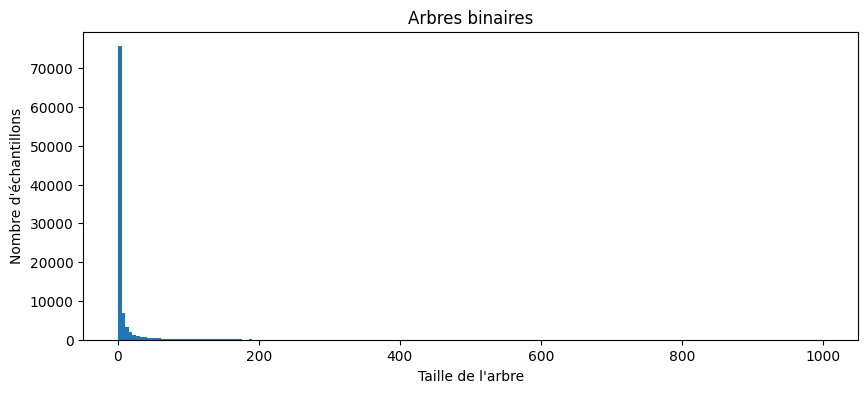

<Figure size 2000x400 with 0 Axes>

In [16]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
#plt.axis([0, 1000, 0, 5000])
f = plt.figure()
f.set_figwidth(20)
plt.show()

In [17]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_free2(.2499999, 1000)[1], n)

trop grands = 97773, taille max = 1000, moyenne des tailles = 7.30929


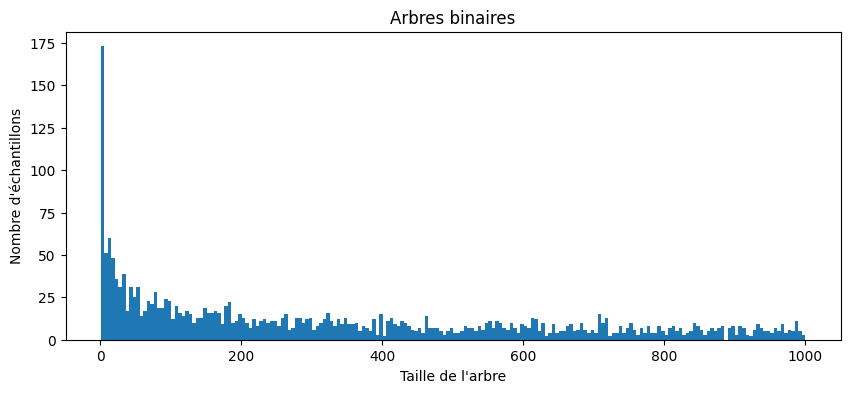

<Figure size 2000x400 with 0 Axes>

In [18]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()